<a href="https://colab.research.google.com/github/amiralirh/AI_Proj4032/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1FXdsX4VkJEO97xG3LUZsEz1zbn8Sef6t

Downloading...
From: https://drive.google.com/uc?id=1FXdsX4VkJEO97xG3LUZsEz1zbn8Sef6t
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 48.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

In [ ]:
# Step 1: Data Cleaning and Handling Zero Values
# =======================================================

# Columns with illogical zero values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with the median of non-zero values
for column in columns_with_zeros:
    median_val = df.loc[df[column] != 0, column].median()
    df[column] = df[column].replace(0, median_val)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

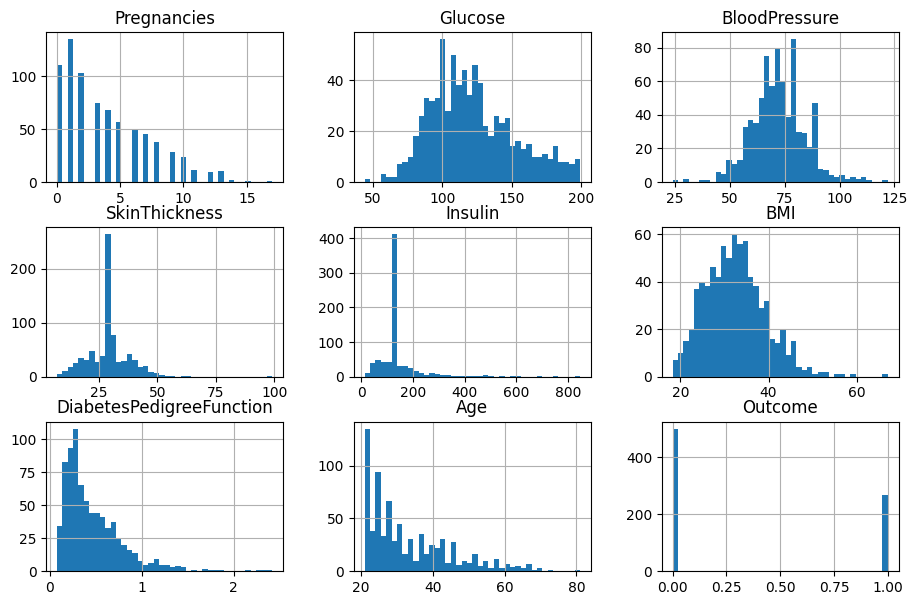

In [ ]:
df.hist(bins=40, figsize=(11,7))

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


In [ ]:
# Step 2: Data Preparation and Normalization
# =======================================================
# Define features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Step 3: Random Forest Model Implementation and Evaluation
# =======================================================
# Create a Random Forest model instance
# n_estimators specifies the number of trees, set to 100 here
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Calculate and display evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest Model Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Random Forest Model Evaluation Results:
Accuracy: 0.7792
Precision: 0.7273
Recall: 0.5926
F1-Score: 0.6531
